# Simple computation sheet for early stage building design

## Available openweather files:

In [8]:
%matplotlib inline
import configparser
import buildingenergy.lambdahouse

from os import listdir
from os.path import isfile, join

config = configparser.ConfigParser()
config.read('setup.ini')

data_path = config['folders']['data']

for file in listdir(data_path):
    if isfile(join(data_path, file)) and file.endswith('.json'):
        print('-', file)

- coimbra.json
- tirana.json
- bucharest-unirii.json
- grenoble1979-2022.json
- grenoble_weather2015-2019.json
- villard-de-Lans_autrans_2000-2022.json
- engins.json
- refuge-des-bans.json
- briancon.json
- viriville.json


## Configuration

In [9]:
class Configuration(buildingenergy.lambdahouse.Configuration):   
    """
    Configuration of the lambda-house: this is a reference house used to appreciate the features of a building taking into account the weather file (json weather file from https://openweathermap.org metric units and Celsius degrees), an optional solar mask (https://globalsolaratlas.info), the year under interested, the sea_level_in_meter and the albedo (0.1 by default).

    Other parameter values describing the lambda house can also be specified here. The best way to configure is not inherit from this Configuration class, and to modified only the values that have to be changed.
    """

    def __init__(self, jupyter_notebook=True):
        """Initialize a default configuration of the lambda-house
        """
        self.jupyter_notebook = jupyter_notebook
        # site
        self.weather_file_name = 'grenoble1979-2022.json'
        self.weather_year = 2019
        self.sea_level_in_meter = 290
        self.albedo = 0.1
        # for sky horizon, see https://globalsolaratlas.info
        self.sky_horizon = [ (360-180,15),(320-180,7),(290-180,10),(225-180,10),(200-180,7),(140-180,7),(135-180,10),(100-180,23),(50-180,23),(40-180,15),(-180,7) ]
        # lambda house geometry
        self.total_living_surface= 100
        self.height_per_floor = 3
        self.shape_factor = 1
        self.number_of_floors = 1
        self.wall_composition_in_out = (('polystyrene', 16e-2), ('concrete', 13e-2), ('plaster', 13e-3))
        self.roof_composition_in_out = (('brick', 2e-2), ('foam', 16e-2), ('plaster', 13e-3))
        self.glass_composition_in_out = (('glass', 5e-3), ('air', 12e-2), ('glass_foam', 5e-3))
        self.ground_composition_in_out = (('concrete', 13e-2), ('polystyrene', 16e-2), ('gravels', 50e-2))
        self.shape_factors = [.25, .5, .75, 1, 1.25, 1.5, 1.75, 2]
        # lambda house windows
        self.offset_exposure = 0
        self.offset_exposures = [alpha for alpha in range(-90, 90, 5)]
        self.beta = {'north': 0.1, 'west': 0.1, 'east': 0.1, 'south': 0.1}
        self.beta_variation = [0, .1, .2, .4, .8]
        self.solar_factor = 0.85
        self.south_solar_protection_angle = 60
        # lambda house HVAC
        self.high_heating_setpoint = 21
        self.high_heating_setpoints = [18, 19, 20, 21, 22, 23]  # 20 has to be in the list
        self.low_heating_setpoint = 17
        self.cooling_setpoint = 23
        self.air_renewal = 0.8
        self.ventilation_heat_recovery_efficiency = 0.85
        # lambda house occupancy
        self.occupancy_schema = { # days of weeks (1=Monday,...), period (start. hour, end. hour) : avg occupancy
            (1, 2, 3, 4, 5): {(18,8): 3, (8, 18): 0},
            (6, 7): {(0, 24): 2}
            }
        self.average_occupancy_gain = 150
        self.average_permanent_gain = 50
        # lambda house production
        self.PV_efficiency = 0.15

## Lambda house analysis

> selected location: Grenoble
* available location> Grenoble
# Report dealing with a lambda-house with weather file grenoble1979-2022.json 


## Features of the Lambda House 
### Site 
* Weather file name: grenoble1979-2022.json (year: 2019)
* sea level in meter: 290 
* albedo: 0.100000 (reflexion of the ground) 
* sky horizon: (AZ:180.000000, AL:15.000000),(AZ:140.000000, AL:7.000000),(AZ:110.000000, AL:10.000000),(AZ:45.000000, AL:10.000000),(AZ:20.000000, AL:7.000000),(AZ:-40.000000, AL:7.000000),(AZ:-45.000000, AL:10.000000),(AZ:-80.000000, AL:23.000000),(AZ:-130.000000, AL:23.000000),(AZ:-140.000000, AL:15.000000),(AZ:-180.000000, AL:7.000000),
### Geometry 
* total living surface 100m2 (100m2 / floor) 
* number of floors 1 
* height 3.00m 
* shape factor 100% (the higher value the larger the south and north sides, the smaller the west and east sides) 
* shape factors for parametric study: 25%, 50%, 75%, 100%, 125%, 150%, 175%, 200%, 
 wall composition in out 
	+ polystyrene with 

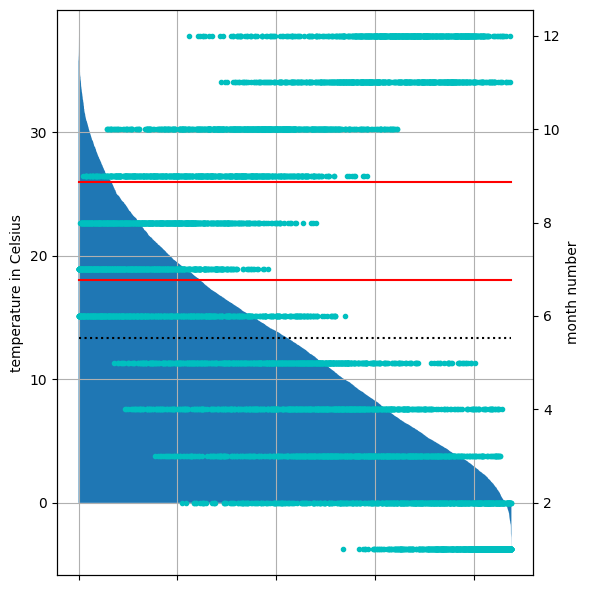

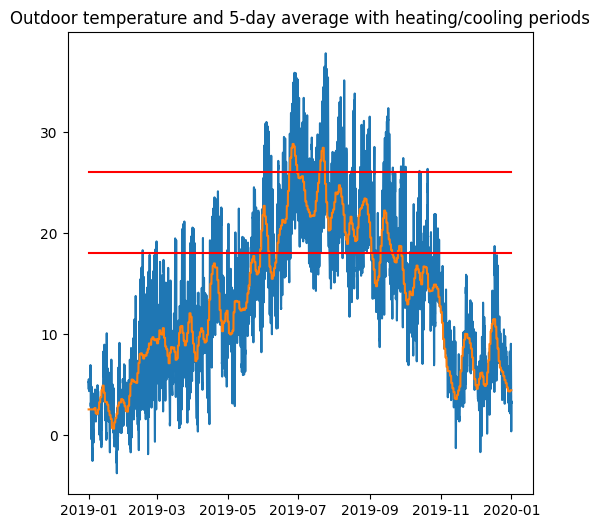

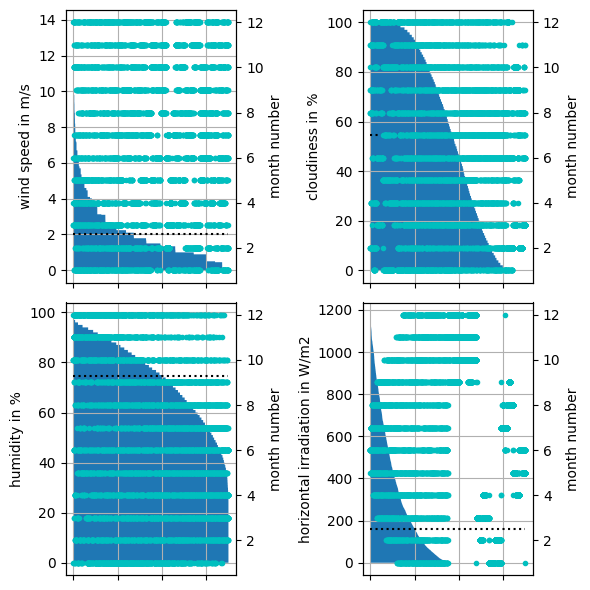

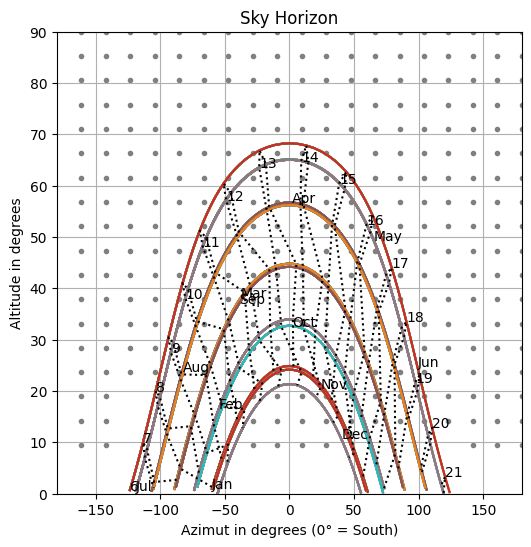

## House Analysis

Detected heating period: 28 September till 29 May


Detected cooling period: 23 June till 24 July


Energy needs from heater without inertia (useless heat is free power gain not useful for heating because the temperature is higher than the requested set-point)

Energy needs from heater with inertia (useless heat is free power gain not useful for heating because the temperature is higher than the requested set-point)

Energy needs from climatisation without inertia

Energy needs from climatisation with inertia

## Zero energy over the year

The aim is to appreciate the yearly energy needed by the HVAC system. To do it, the carbon neutrality is searched thanks to a surface of PV panels.

Best PV exposure: 1° and slope 35°

- Required surface of PV for balancing the annual energy consumption of the HVAC system:

+---------------------+------------+---------+
| PV (efficiency: 0%) | no inertia | inertia |
+---------------------+------------+---------+
|        heater    

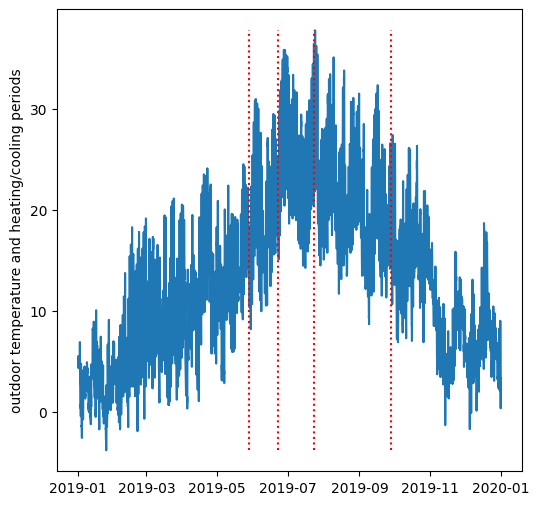

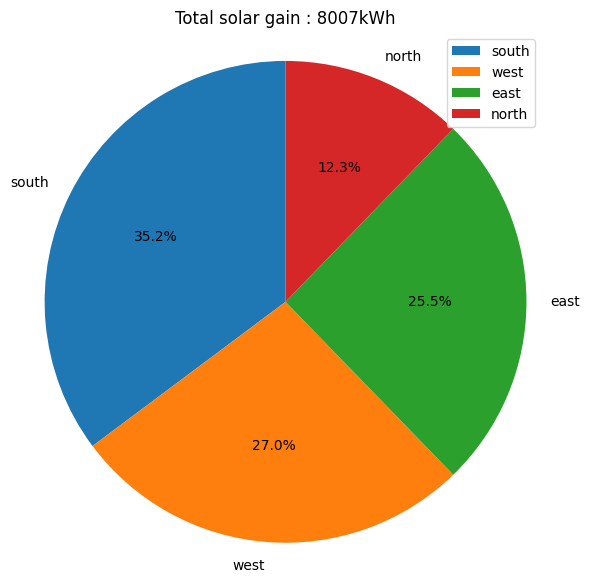

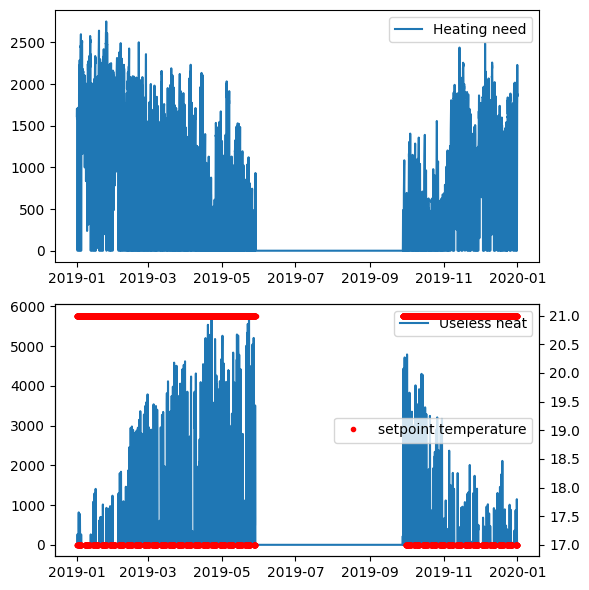

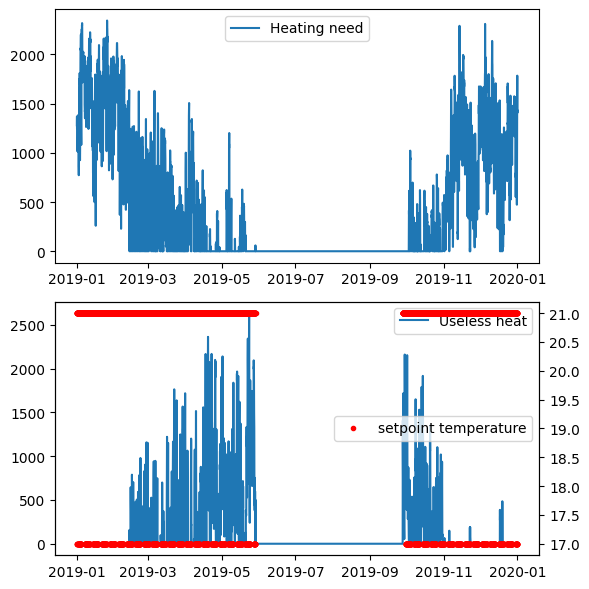

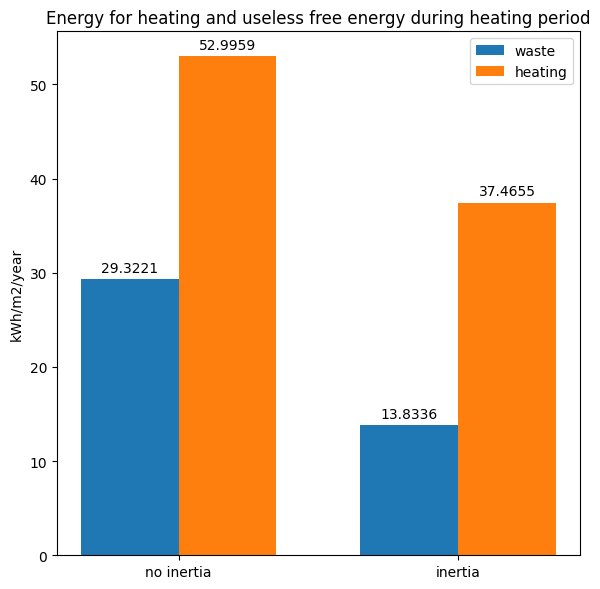

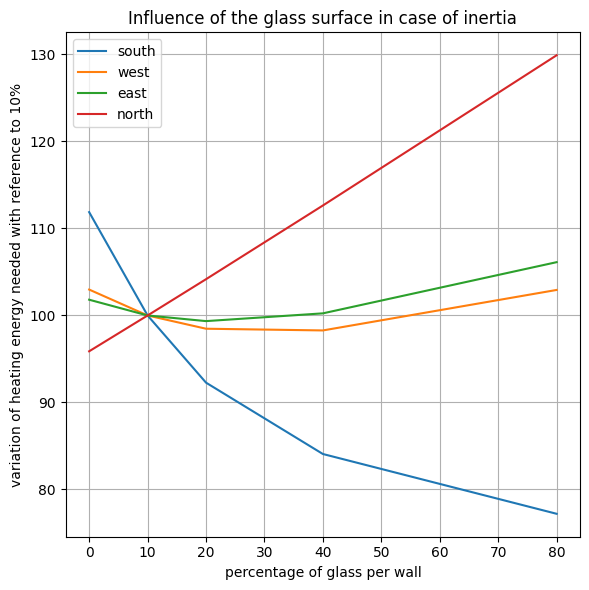

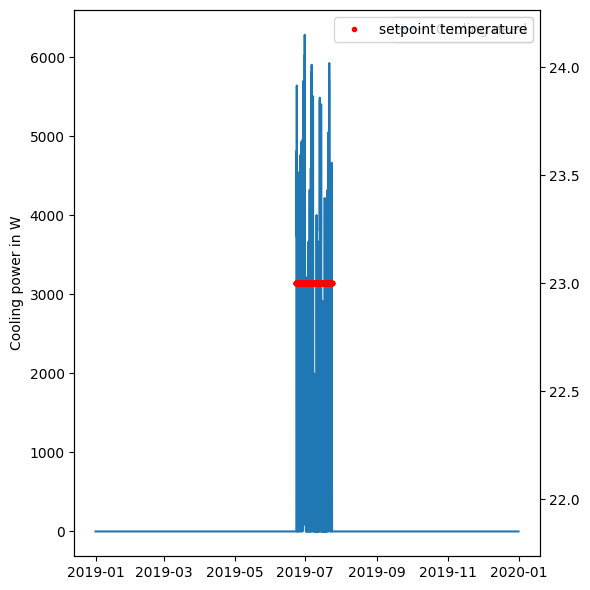

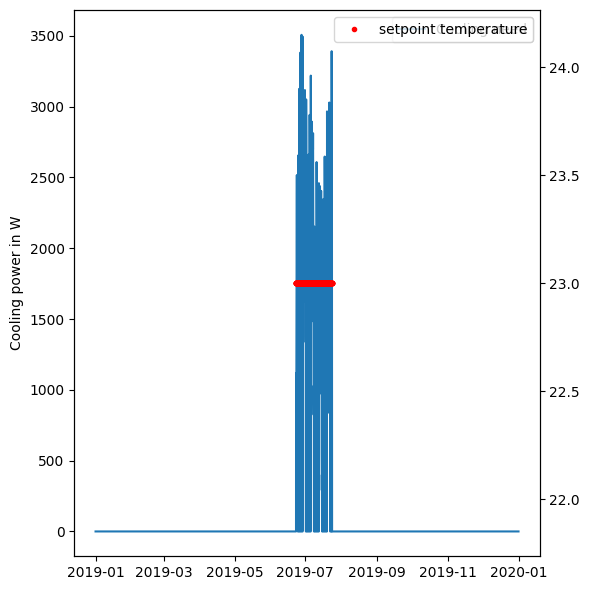

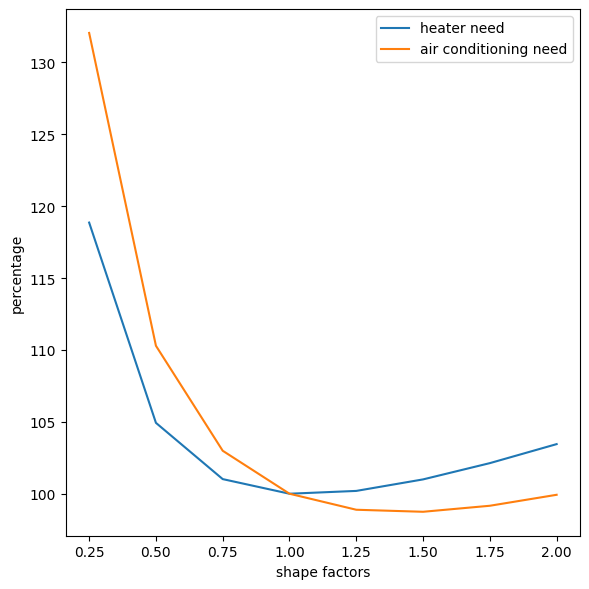

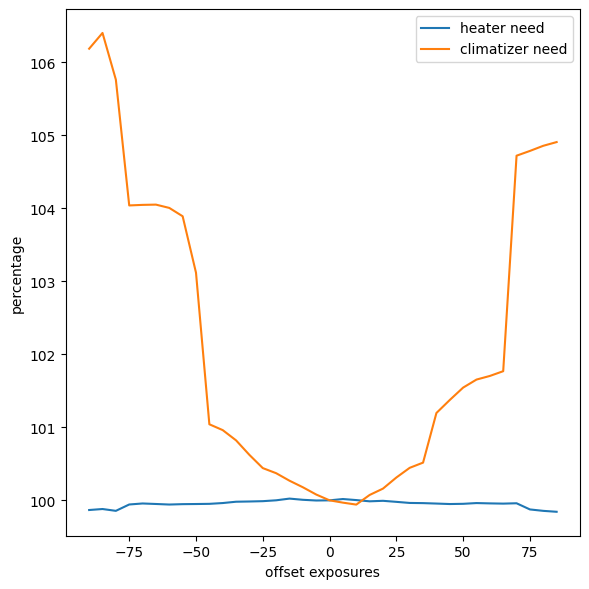

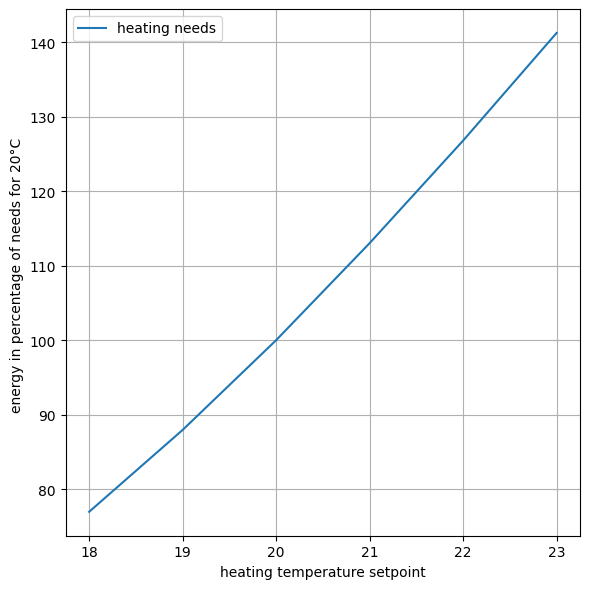

In [10]:
configuration = Configuration()
lambda_house = buildingenergy.lambdahouse.House(configuration)
for _ in lambda_house.results():
    pass

## Excel file generator

In [11]:
open_weather_map_json_reader = buildingenergy.openweather.OpenWeatherMapJsonReader(configuration.weather_file_name, from_stringdate='1/01/%i 0:00:00' % configuration.weather_year, to_stringdate='1/01/%i 0:00:00' % (configuration.weather_year+1), sea_level_in_meter=configuration.sea_level_in_meter, albedo=configuration.albedo, pollution=0.1, location=None)
site_weather_data = open_weather_map_json_reader.site_weather_data

> selected location: Grenoble
* available location> Grenoble


Adjust sky horizon and solar masks:

In [12]:
import matplotlib.pyplot as plt

sky_horizon_mask = buildingenergy.solar.SkyHorizonZone(configuration.sky_horizon)

#window_solar_mask = buildingenergy.solar.RectangularMask((-73-13, 73-13), (20, 68))  # azimuth and altitude

site = buildingenergy.solar.System(site_weather_data, solar_mask=None)#sky_horizon_mask)
site.add_collector('main', surface=2, exposure_in_deg=-13, slope_in_deg=90, solar_factor=0.85)  #, window_mask=window_solar_mask)

site.generate_xls(config['folders']['results']+'site', heat_temperature_reference=21, cool_temperature_reference=26)

Heating day degrees
day degrees January :  566.2376268115942
day degrees February :  414.1817391304347
day degrees March :  362.06434782608693
day degrees April :  277.7807114624506
day degrees May :  229.40043478260867
day degrees June :  48.5995652173913
day degrees July :  6.095217391304349
day degrees August :  19.77913043478262
day degrees September :  79.68608695652173
day degrees October :  178.96760869565222
day degrees November :  389.34130434782605
day degrees December :  435.11478260869563
Cooling day degrees
day degrees January :  0
day degrees February :  0
day degrees March :  0
day degrees April :  0
day degrees May :  0
day degrees June :  12.736956521739138
day degrees July :  17.284782608695657
day degrees August :  1.2139130434782643
day degrees September :  0
day degrees October :  0
day degrees November :  0
day degrees December :  0


> [download excel file](./results/site.xlsx)

## Box house

In [16]:
from buildingenergy.building import Library, Site, InterfaceType, LayeredInterface


library: Library = Library()
library.store('concrete', 'thermal', 269)
library.store('glass', 'thermal', 267)
library.store('foam', 'thermal', 260)

Site.library = library

tiny_house: Site = Site('indoor',)

surface_south_window: float = (0.5 * 6) * (0.3 * 5)
surface_large_side: float = (0.5 * 10) * (0.3 * 10)
surface_small_side: float = (0.5 * 4 + 0.4 * 2) * (0.3 * 10)
surface_roof: float = (0.5 * 10) * (0.4 * 7)
surface_wall: float = surface_large_side * 2 - surface_south_window + surface_small_side * 2
wall_thickness: float = 0.4
roof_thickness: float = 0.3
glass_thickness: float = 0.004
air_layer_thickness: float = 0.006

wall: LayeredInterface = tiny_house.add_layered_interface('indoor', 'outdoor', InterfaceType.WALL, surface_wall)
wall.add_layer('concrete', 0.10)
wall.add_layer('foam', 0.20)

window: LayeredInterface = tiny_house.add_layered_interface('indoor', 'outdoor', InterfaceType.GLAZING, surface_south_window)
window.add_layer('glass', 0.004)
window.add_layer('air', 0.006)
window.add_layer('glass', 0.004)

roof: LayeredInterface = tiny_house.add_layered_interface('indoor', 'outdoor', InterfaceType.ROOF, surface_roof)
roof.add_layer('concrete', 0.10)
roof.add_layer('foam', 0.20)

Rtotal: float = tiny_house.interface_thermal_resistance('indoor', 'outdoor')
print('Rtotal: %fK/W' % (Rtotal))
print('Utotal: %fW/K' % (1/Rtotal))
print('Utotal_unit: %fW/K.m2' % (1/Rtotal/(surface_wall+surface_south_window+surface_roof)))

Available properties:
- thermal
- Uw_glazing
- glass_transparency
- shading
- solar_absorptivity
- gap_resistance
- ground_reflectance
> get property "conductivity (W/m.K)" for "concrete"
> get property "specific heat capacity (J/kg/K)" for "concrete"
> get property "density (kg/m3)" for "concrete"
> get property "emmisivity coefficient" for "concrete"
> get property "conductivity (W/m.K)" for "glass"
> get property "specific heat capacity (J/kg/K)" for "glass"
> get property "density (kg/m3)" for "glass"
> get property "emmisivity coefficient" for "glass"
> get property "conductivity (W/m.K)" for "polyurethane foam"
> get property "specific heat capacity (J/kg/K)" for "polyurethane foam"
> get property "density (kg/m3)" for "polyurethane foam"
> get property "emmisivity coefficient" for "polyurethane foam"
Rtotal: 0.019908K/W
Utotal: 50.232233W/K
Utotal_unit: 0.826188W/K.m2
